# IMMC 2022 International

In [292]:
import pandas as pd
import numpy as np
import math
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie, Line, Page
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
from shapely.geometry import *
from shapely import affinity
import geopandas as gpd
import random

%matplotlib inline

In [ ]:
time_luggage = 
time_getout = 
time_

In [340]:
p = 189
plane = [
    [2 for i in range(0, p)] + [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0 for i in range(0, p)] + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
# Row                                1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
]
x_min = -p
x_max = 33
x_delta = -x_min # = p
y_min = -4
y_max = 4
y_delta = -y_min
color = ["green", "orange", "red"]
# 0 = Corridor, 1 = Seat, 2 = Wall
# Coords of the Plane

In [273]:
def draw(drawLine = False, drawPassanger = False):
    fig, ax = plt.subplots(figsize = (36, 7))
    
    ymin = y_min + y_delta
    ymax = y_max + y_delta + 1
    xmin = x_min + x_delta
    xmax = x_max + x_delta + 1
    
    yrmin = y_min - 1.5
    yrmax = y_max + 1.5
    xrmin = x_min - 1.5
    xrmax = x_max + 1.5
    ticks_frequency = 5
    
    if not drawLine:
        xmin += p
        xrmin += p
        ticks_frequency = 1
        
    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            ri = i - y_delta
            rj = j - p
            ext = [(rj - 0.5, ri - 0.5), (rj - 0.5, ri + 0.5), (rj + 0.5, ri + 0.5), (rj + 0.5, ri - 0.5)]
            polygon = Polygon(ext)
            gpd.GeoSeries(polygon).plot(ax = ax, color = color[plane[i][j]], alpha = 0.5)

    if drawPassanger:
        for i in passangerlist:
            ax.plot(i.location_x, i.location_y, c="red")

    ax.set(xlim = (xrmin, xrmax), ylim = (yrmin, yrmax), aspect = 'equal')

    ax.set_xlabel('x', size = 14, labelpad = -24, x = 1.03)
    ax.set_ylabel('y', size = 14, labelpad = -21, y = 1.02, rotation = 0)

    x_ticks = np.arange(xrmin, xrmax, ticks_frequency)
    y_ticks = np.arange(yrmin, yrmax, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    ax.grid(which = 'both', color = 'black', linewidth = 2, linestyle = '-', alpha = 0.2)

    ax.plot([xrmin, xrmax], [0, 0], c = "black", linewidth = 2.5, alpha = 0.75)
    ax.plot([0, 0], [yrmin, yrmax], c = "black", linewidth = 2.5, alpha = 0.75)

    arrow_fmt = dict(markersize = 8, color='black', clip_on = False)
    ax.plot((xrmax), (0), marker = '>', **arrow_fmt)
    ax.plot((0), (yrmax), marker = '^', **arrow_fmt)
    ax.plot((xrmin), (0), marker = '<', **arrow_fmt)
    ax.plot((0), (yrmin), marker = 'v', **arrow_fmt)

    plt.show()

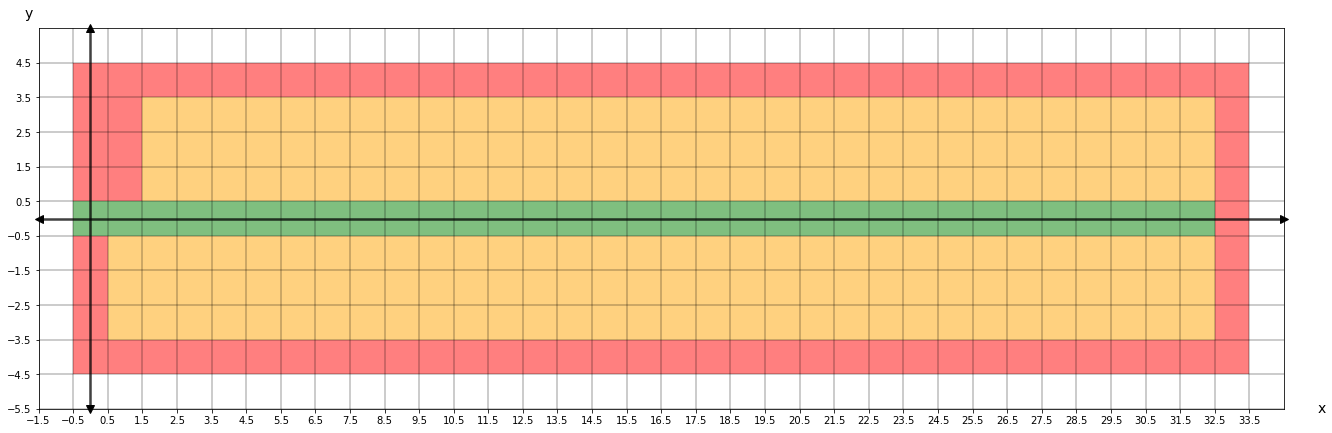

In [240]:
draw(False, False)

In [344]:
class Passenger:
    uuid = 0
    location_x = 0
    location_y = 0
    destination_x = 0
    destination_y = 0
    status = 0 # 0: normal, 1: luggage, 2: change seat
    status_time = 0 
    
    def __init__(self, destination_x, destination_y, uuid):
        self.destination_x = destination_x
        self.destination_y = destination_y
        self.uuid = uuid

In [337]:
passengerList = []
print(passengerList)

[]


In [352]:
for i in range(y_min + y_delta, y_max + y_delta + 1):
    for j in range(x_min + x_delta, x_max + x_delta + 1):
        print(plane[i][j], end = " ")
    print()

2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [371]:
passengerList = []

def init(shuffle = "random", typ = "ftb"):
    global passengerList
    uuid = 1
    
    for i in range(y_min + y_delta, y_max + y_delta + 1):
        for j in range(x_min + x_delta + p, x_max + x_delta + 1):
            if plane[i][j] == 1:
                passengerList.append(Passenger(j - p, i - y_delta, uuid))
                uuid += 1
                
    if shuffle == "random":
        random.shuffle(passengerList)
        
    if shuffle == "seat":
        passengerListFront = []
        passengerListMiddle = []
        passengerListEnd = []
        for i in passengerList:
            if i.destination_x <= 11:
                passengerListFront.append(i)
            elif i.destination_x <= 21:
                passengerListMiddle.append(i)
            else:
                passengerListEnd.append(i)
                
        random.shuffle(passengerListFront)
        random.shuffle(passengerListMiddle)
        random.shuffle(passengerListEnd)
                
        if typ == "ftb":
            passengerList = passengerListFront + passengerListMiddle + passengerListEnd
        else:
            passengerList = passengerListEnd + passengerListMiddle + passengerListFront
            
    if shuffle == "window":
        passengerListWindow = []
        passengerListMiddle = []
        passengerListAisle = []
        for i in passengerList:
            if abs(i.destination_y) == 3:
                passengerListWindow.append(i)
            elif abs(i.destination_y) == 2:
                passengerListMiddle.append(i)
            else:
                passengerListAisle.append(i)
                
        random.shuffle(passengerListWindow)
        random.shuffle(passengerListMiddle)
        random.shuffle(passengerListAisle)
        
        passengerList = passengerListWindow + passengerListMiddle + passengerListAisle
        
init("window")

location = -1

print("id seatx seaty locx locy")

for i in passengerList:
    i.location_x = location
    location -= 1
    print(str(i.uuid) + " " + str(i.destination_x) + " " + str(i.destination_y) + " " + str(i.location_x) + " " + str(i.location_y))

id seatx seaty locx locy
189 32 3 -1 0
22 22 -3 -2 0
19 19 -3 -3 0
2 2 -3 -4 0
21 21 -3 -5 0
11 11 -3 -6 0
30 30 -3 -7 0
18 18 -3 -8 0
9 9 -3 -9 0
169 12 3 -10 0
159 2 3 -11 0
160 3 3 -12 0
26 26 -3 -13 0
6 6 -3 -14 0
182 25 3 -15 0
14 14 -3 -16 0
181 24 3 -17 0
183 26 3 -18 0
168 11 3 -19 0
175 18 3 -20 0
176 19 3 -21 0
161 4 3 -22 0
171 14 3 -23 0
17 17 -3 -24 0
29 29 -3 -25 0
1 1 -3 -26 0
179 22 3 -27 0
7 7 -3 -28 0
162 5 3 -29 0
188 31 3 -30 0
4 4 -3 -31 0
13 13 -3 -32 0
5 5 -3 -33 0
173 16 3 -34 0
10 10 -3 -35 0
164 7 3 -36 0
167 10 3 -37 0
185 28 3 -38 0
15 15 -3 -39 0
165 8 3 -40 0
20 20 -3 -41 0
177 20 3 -42 0
3 3 -3 -43 0
163 6 3 -44 0
178 21 3 -45 0
174 17 3 -46 0
170 13 3 -47 0
23 23 -3 -48 0
12 12 -3 -49 0
32 32 -3 -50 0
166 9 3 -51 0
16 16 -3 -52 0
172 15 3 -53 0
180 23 3 -54 0
8 8 -3 -55 0
187 30 3 -56 0
28 28 -3 -57 0
184 27 3 -58 0
186 29 3 -59 0
27 27 -3 -60 0
31 31 -3 -61 0
25 25 -3 -62 0
24 24 -3 -63 0
43 11 -2 -64 0
52 20 -2 -65 0
64 32 -2 -66 0
46 14 -2 -67 0
146 2

In [ ]:
while(True):
    i
    for i in passanger_list:
        